# Análise e Explorar do Conjunto de Dados da UCI sobre Doença Cardíaca

<p>
Iremos explorar o conjunto de dados do kaggle sobre doença cardíaca, iremos conhecer e análisar os dados e por fim criar modelos e comparar seus resultados utilizando as metricas que conheço para entender sua performance de identificar casos que sejam ou não com doença cardíaca.

Este conjunto de dados data de 1988 e consiste em quatro bancos de dados: Cleveland, Hungria, Suíça e Long Beach V. Ele contém 76 atributos, incluindo o atributo previsto, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. O campo "target" refere-se à presença de doença cardíaca no paciente. É um valor inteiro 0 = sem doença e 1 = doença.

OBJETIVO: Análisar o conjunto e criar um modelo que posa identificar a presença de doença cardiaca em um individuo.
</p>

Descrição das colunas:


1.   age (Idade)
2.   sex (Sexo)
3.   cp (Tipo de dor no peito (4 valores))
4.   trestbps (Pressure pressão arterial em repouso)
5.   chol (Colesterol sérico em mg/dl)
6.   fbs (Glicemia em jejum > 120 mg/dl)
7.   restecg (Resultados eletrocardiográficos em repouso (valores 0,1,2))
8.   thalach (Frequência cardíaca máxima alcançada)
9.   exang (Angina induzida por exercício)
10.  oldpeak (Oldpeak = depressão do segmento ST induzida por exercício em)
11.  slope (A inclinação do pico do segmento ST do exercício)
12.  ca (número de vasos principais (0-3) coloridos por fluoroscopia)
13.  thal (thal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível)
14.  target(Prensença ou não de doença)




Fonte do conjunto de dados: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
# Certifique-se de que o Kaggle API Key está configurado
!kaggle datasets download -d johnsmith88/heart-disease-dataset
!unzip heart-disease-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 10.1MB/s]
Archive:  heart-disease-dataset.zip
  inflating: heart.csv               


In [3]:
# Depois de extraído, carregue o arquivo CSV
df_heart = pd.read_csv("heart.csv")
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


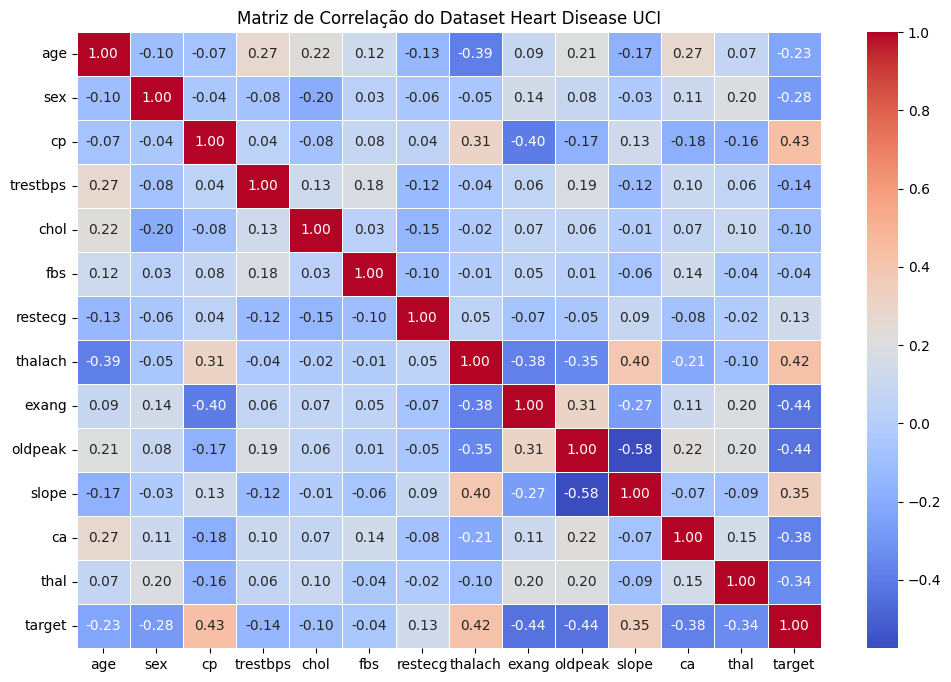

In [6]:
correlation_matrix = df_heart.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação do Dataset Heart Disease UCI')
plt.show()

## Observações
<p>

Temos variáveis que medem os resultados de exercícios físicos, como exang e oldpeak, e ambas apresentam uma correlação negativa com a variável target, indicando que o exercício ajuda a prevenir doenças cardíacas. A variável exang refere-se à angina induzida por exercício, ou seja, indica se o paciente apresentou dor no peito durante a atividade física; já oldpeak representa a depressão do segmento ST durante o exercício, um marcador que pode indicar isquemia. Observamos também que slope, uma variável que mede a inclinação do segmento ST durante o teste de esforço, está positivamente correlacionada com a target. Quando slope tem um valor de 3, significa que há um segmento ST descendente durante o esforço, o que pode indicar isquemia miocárdica, uma condição comum em pessoas com doença cardíaca.

Além disso, a variável thalach, que representa a frequência cardíaca máxima atingida, possui correlação negativa com exang e oldpeak e positiva com slope, o que nos fornece insights interessantes sobre o comportamento dessas variáveis e como elas se relacionam entre si e com a target. Esses fatores nos mostram variáveis bem definidas no contexto clínico.

</p>

## Visualização

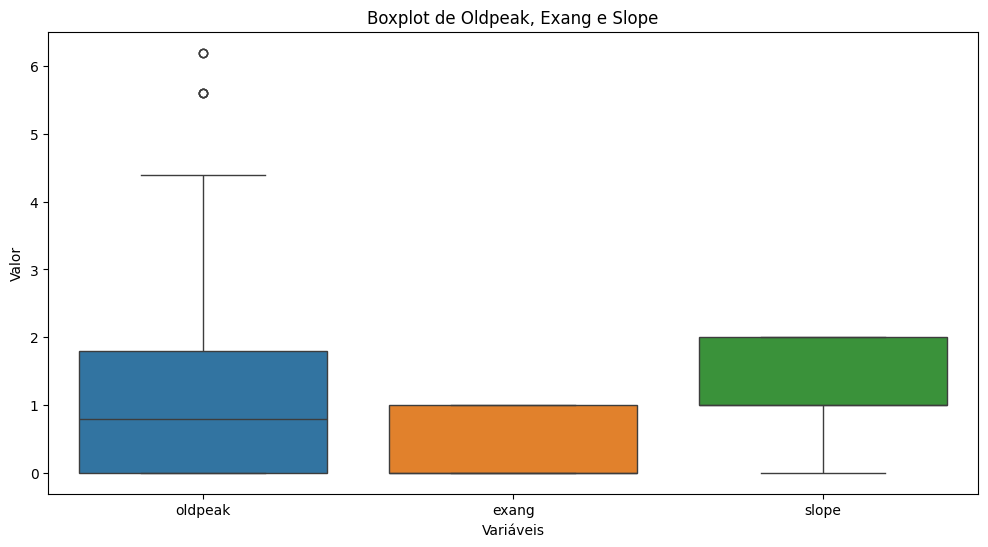

In [7]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_heart[['oldpeak', 'exang', 'slope']])

plt.title("Boxplot de Oldpeak, Exang e Slope")
plt.ylabel("Valor")
plt.xlabel("Variáveis")
plt.show()

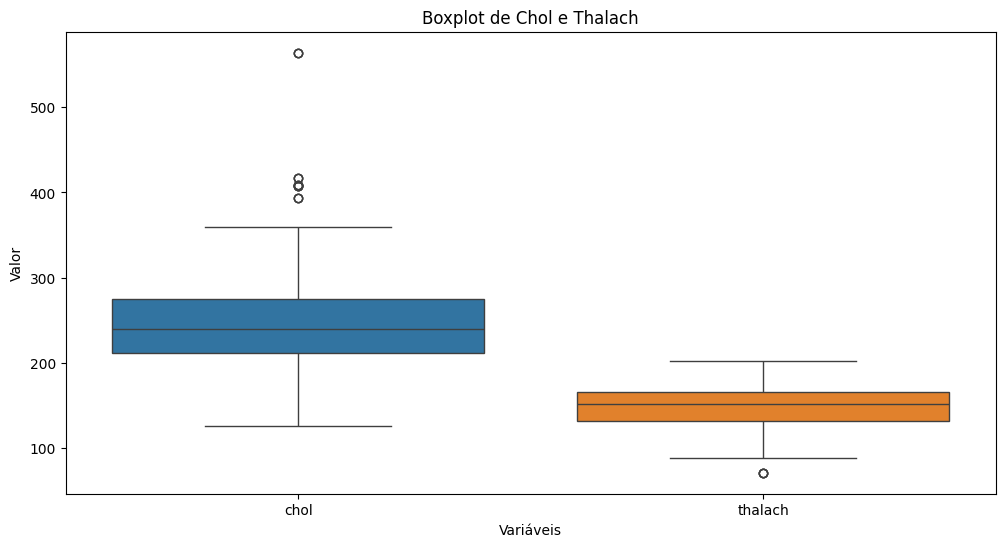

In [8]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_heart[['chol', 'thalach']])

plt.title("Boxplot de Chol e Thalach")
plt.ylabel("Valor")
plt.xlabel("Variáveis")
plt.show()

##### Observação

Dos boxplots acima mostra que os valores não estão tão dispersos além da variavel chrol que contém mais outliers.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

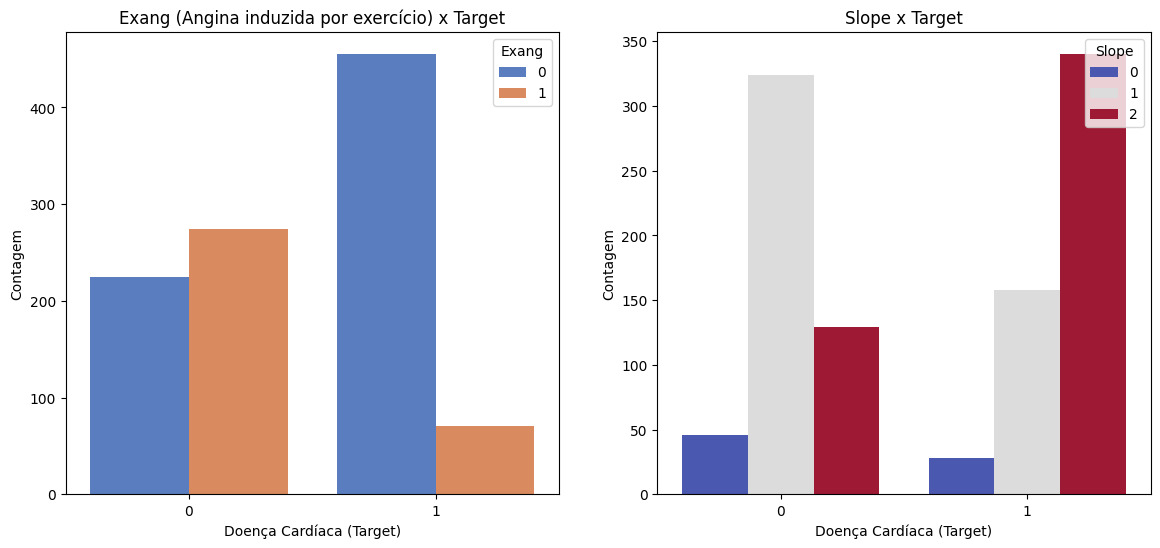

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Exang vs Target
sns.countplot(ax=axes[0], x='target', hue='exang', data=df_heart, palette="muted")
axes[0].set_title("Exang (Angina induzida por exercício) x Target")
axes[0].set_xlabel("Doença Cardíaca (Target)")
axes[0].set_ylabel("Contagem")
axes[0].legend(title="Exang", loc='upper right')

# Slope vs Target
sns.countplot(ax=axes[1], x='target', hue='slope', data=df_heart, palette="coolwarm")
axes[1].set_title("Slope x Target")
axes[1].set_xlabel("Doença Cardíaca (Target)")
axes[1].set_ylabel("Contagem")
axes[1].legend(title="Slope", loc='upper right')

plt.tight_layout

##### Observação

O primeiro gráfico sobre Exang x Target mostra que pessoas que têm angina induzida por exercício (exang = 1) apresentam um número menor de casos de doenças cardíacas (target = 1) em comparação com aquelas que não têm angina induzida por exercício (exang = 0).

O segundo gráfico sobre Slope x Target revela que os valores de slope 1 e 2 estão presentes em pessoas com doença cardíaca. Há uma troca entre as colunas. Para pessoas sem a doença (target = 0), o slope 1 é mais frequente, enquanto para pessoas com a doença (target = 1), o slope 2 é o mais prevalente. No entanto, o slope 1 também é relevante para pessoas com a doença, já que ele aparece em uma proporção significativa entre os pacientes. Isso indica que, embora o slope 2 seja mais comum em pessoas com doença cardíaca, o slope 1 ainda tem um papel importante entre esses pacientes.

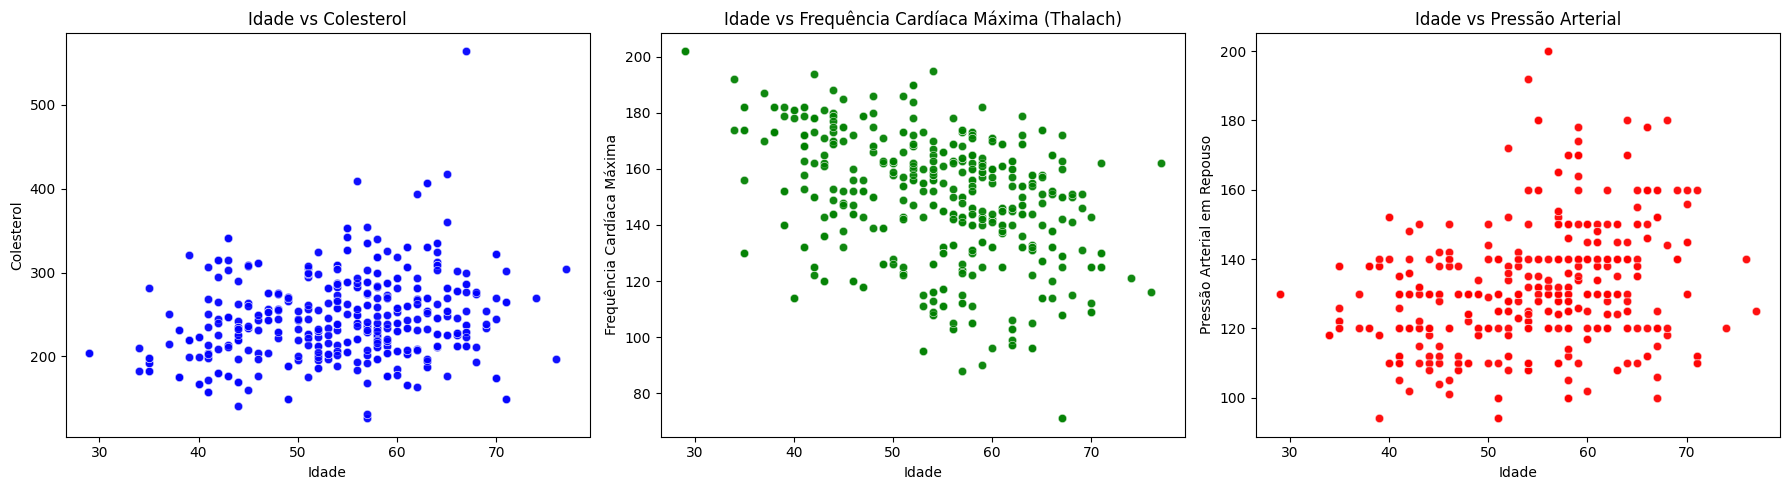

In [10]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_heart, x='age', y='chol', color='blue', alpha=0.6)
plt.title("Idade vs Colesterol")
plt.xlabel("Idade")
plt.ylabel("Colesterol")

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_heart, x='age', y='thalach', color='green', alpha=0.6)
plt.title("Idade vs Frequência Cardíaca Máxima (Thalach)")
plt.xlabel("Idade")
plt.ylabel("Frequência Cardíaca Máxima")

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_heart, x='age', y='trestbps', color='red', alpha=0.6)
plt.title("Idade vs Pressão Arterial")
plt.xlabel("Idade")
plt.ylabel("Pressão Arterial em Repouso")

plt.tight_layout()
plt.show()

##### Observação
O nível de colesterol por idade é bem concentrado nas idades de 50 a 65. Antes e depois desse intervalo, há uma grande dispersão, indicando maior variação do colesterol nessas faixas etárias.

Na frequência cardíaca máxima, observamos que, com o passar dos anos, ela diminui lentamente. Entre o grupo de 50 a 65 anos, vemos uma grande dispersão nos valores, onde, aproximadamente aos 53-54 anos, há valores mínimos próximos de 100 e máximos próximos de 200.

Por fim, a pressão arterial se mostra relativamente constante, com a maioria dos valores abaixo de 140, e uma dispersão maior após os 50 anos.

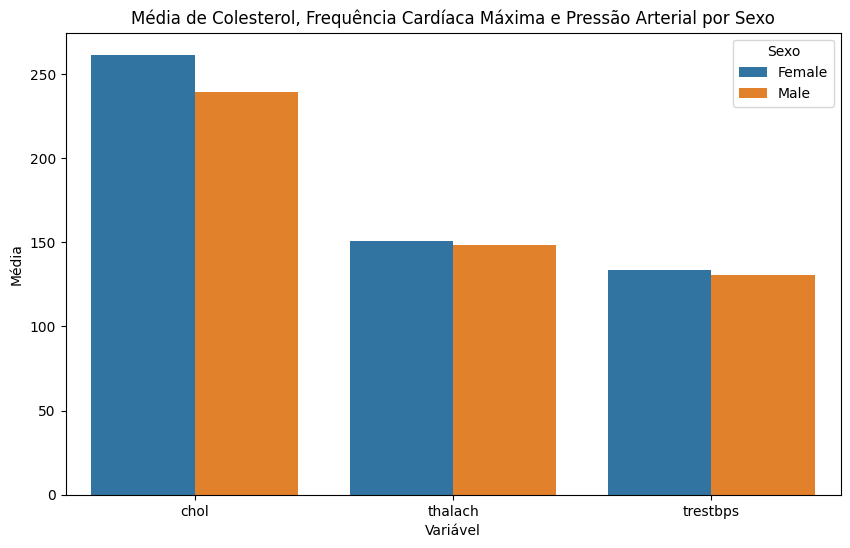

In [11]:
df_avg_by_sex = df_heart.groupby('sex')[['chol', 'thalach', 'trestbps']].mean().reset_index()

df_avg_by_sex['sex'] = df_avg_by_sex['sex'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(10, 6))

df_melted = df_avg_by_sex.melt(id_vars='sex', value_vars=['chol', 'thalach', 'trestbps'],
                               var_name='Variable', value_name='Average')

sns.barplot(data=df_melted, x='Variable', y='Average', hue='sex')
plt.title('Média de Colesterol, Frequência Cardíaca Máxima e Pressão Arterial por Sexo')
plt.xlabel('Variável')
plt.ylabel('Média')
plt.legend(title='Sexo')
plt.show()

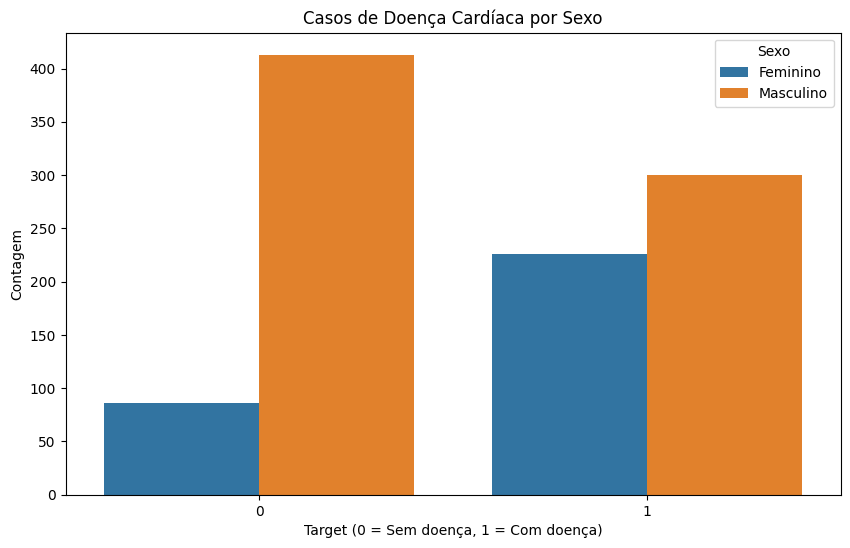

In [12]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df_heart, x='target', hue='sex')
plt.title('Casos de Doença Cardíaca por Sexo')
plt.xlabel('Target (0 = Sem doença, 1 = Com doença)')
plt.ylabel('Contagem')
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'])
plt.show()

##### Observação

Este gráfico mostra que, embora a média de colesterol, frequência cardíaca máxima e pressão arterial por sexo apresentem resultados próximos, a quantidade de homens com alguma doença cardíaca é relativamente maior do que a de mulheres. Além disso, observamos um ponto relevante para o nosso estudo e para a criação do modelo: a quantidade de homens e mulheres observados no estudo é significativamente diferente.



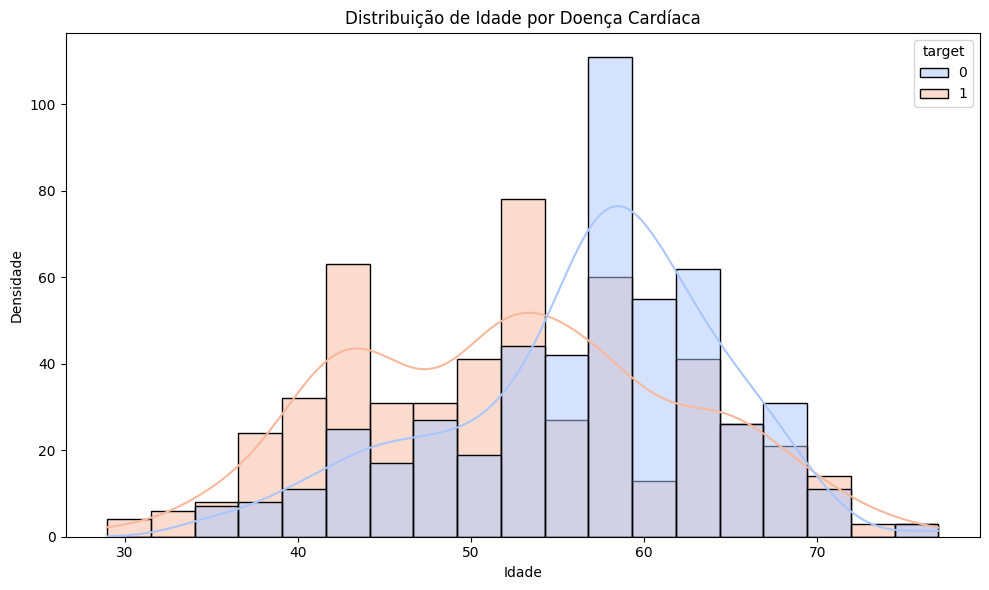

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.histplot(ax=axes, x='age', hue='target', kde=True, data=df_heart, palette="coolwarm")
axes.set_title("Distribuição de Idade por Doença Cardíaca")
axes.set_xlabel("Idade")
axes.set_ylabel("Densidade")

plt.tight_layout()
plt.show()

##### Observação

A distribuição mostra claramente como as idades estão relacionadas com a doença, evidenciando que, com o passar do tempo, as pessoas sem a doença são predominantes. Isso pode indicar que até os 55 anos as pessoas tendem a não se preocupar com cuidados preventivos, e após essa idade, começam a se cuidar mais. No entanto, também pode ser uma característica do nosso conjunto de dados, que apresenta um número reduzido de pessoas com mais de 55 anos sem a doença, o que pode refletir uma limitação na amostra.

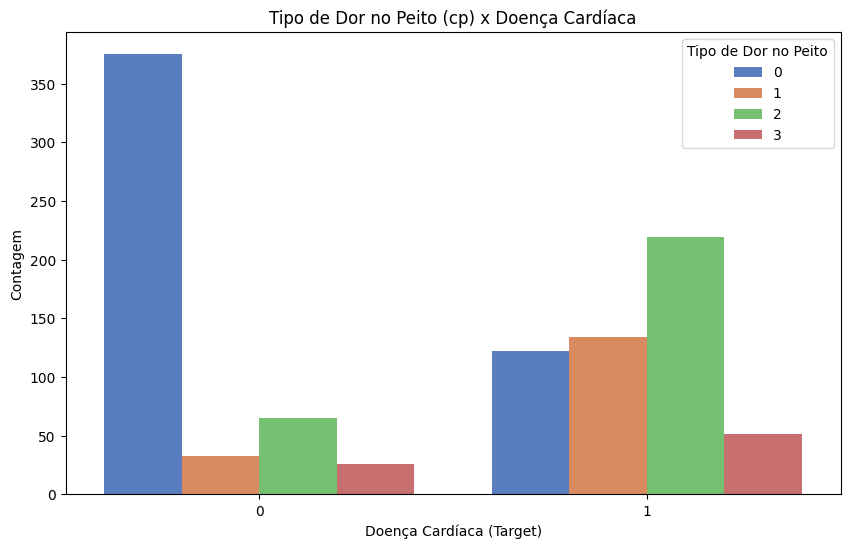

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', hue='cp', data=df_heart, palette="muted")

plt.title("Tipo de Dor no Peito (cp) x Doença Cardíaca")
plt.xlabel("Doença Cardíaca (Target)")
plt.ylabel("Contagem")

plt.legend(title="Tipo de Dor no Peito", loc='upper right')

plt.show()

##### Observação

Este gráfico demonstra como a análise do tipo de dor no peito é relevante. Pessoas com a doença cardíaca apresentam dores iguais ou superiores a 1, o que sugere que qualquer sinal de dor no peito pode ser um indicativo de doença cardíaca. Isso destaca a importância de observar sintomas, mesmo que inicialmente não pareçam graves, pois podem ser sinais precoces de problemas cardíacos.

# Modelos

In [15]:
X = df_heart.drop('target', axis=1)
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
# Regressão Logistica
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [24]:
# Arvore de Decisao
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [27]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [30]:
def evaluate_model(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

In [31]:
print('Regressão Logistica')
evaluate_model(log_reg)


Regressão Logistica
Acurácia: 0.8052
Precisão: 0.7633
Recall: 0.8658
F1-Score: 0.8113


In [32]:
print('Decision Tree')
evaluate_model(decision_tree)

Decision Tree
Acurácia: 0.9708
Precisão: 1.0000
Recall: 0.9396
F1-Score: 0.9689


In [33]:
print('Random Forest')
evaluate_model(random_forest)

Random Forest
Acurácia: 0.9805
Precisão: 1.0000
Recall: 0.9597
F1-Score: 0.9795


In [34]:
print('XGBoost')
evaluate_model(xgboost)

XGBoost
Acurácia: 0.9805
Precisão: 1.0000
Recall: 0.9597
F1-Score: 0.9795


In [35]:
print('KNN')
evaluate_model(knn)

KNN
Acurácia: 0.7143
Precisão: 0.6943
Recall: 0.7315
F1-Score: 0.7124


In [36]:
print('SVM')
evaluate_model(svm)

SVM
Acurácia: 0.6753
Precisão: 0.6467
Recall: 0.7248
F1-Score: 0.6835


## Conclusão dos modelos

Os melhores modelos foram o XGBoost e o Random Forest, ambos com um F1-Score de 97.95%. Um F1-Score elevado é ideal para este conjunto de dados, pois combina Precisão e Recall em uma média harmônica, o que permite uma análise equilibrada entre os dois. O foco em um Recall alto é especialmente relevante para o contexto de diagnósticos médicos, pois indica que o modelo identifica bem os casos positivos, tanto para verdadeiros positivos quanto para falsos positivos. Isso é importante para minimizar a chance de falsos negativos, evitando diagnósticos incorretos de ausência de doença em pacientes que podem realmente estar doentes.

Para o KNN e SVM talvez pelo conjunto de dados não ter sido trato e conter outliers eles poder sido afetos por esses dados, uma forma de tentar melhor os seus resultados e até mesmo dos outros modelos seria tirar os outliers e ver comparar os resultados.

# Refazendo os Modelos sem Outliers

In [39]:
from scipy.stats import zscore
import numpy as np


In [40]:
z_scores = np.abs(zscore(df_heart.select_dtypes(include=np.number)))  # apenas variáveis numéricas
df_no_outliers = df_heart[(z_scores < 3).all(axis=1)]

In [41]:
X = df_no_outliers.drop('target', axis=1)
y = df_no_outliers['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [42]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

Regressão Logistica
Acurácia: 0.8763
Precisão: 0.8797
Recall: 0.8910
F1-Score: 0.8854
Decision Tree
Acurácia: 0.9656
Precisão: 0.9740
Recall: 0.9615
F1-Score: 0.9677
Random Forest
Acurácia: 0.9897
Precisão: 1.0000
Recall: 0.9808
F1-Score: 0.9903
XGBoost
Acurácia: 0.9897
Precisão: 1.0000
Recall: 0.9808
F1-Score: 0.9903
KNN
Acurácia: 0.7113
Precisão: 0.7571
Recall: 0.6795
F1-Score: 0.7162
SVM
Acurácia: 0.7491
Precisão: 0.7578
Recall: 0.7821
F1-Score: 0.7697


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:56:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [43]:
print('Regressão Logistica')
evaluate_model(log_reg)

Regressão Logistica
Acurácia: 0.8763
Precisão: 0.8797
Recall: 0.8910
F1-Score: 0.8854


In [44]:
print('Decision Tree')
evaluate_model(decision_tree)

Decision Tree
Acurácia: 0.9656
Precisão: 0.9740
Recall: 0.9615
F1-Score: 0.9677


In [45]:
print('Random Forest')
evaluate_model(random_forest)

Random Forest
Acurácia: 0.9897
Precisão: 1.0000
Recall: 0.9808
F1-Score: 0.9903


In [46]:
print('XGBoost')
evaluate_model(xgboost)

XGBoost
Acurácia: 0.9897
Precisão: 1.0000
Recall: 0.9808
F1-Score: 0.9903


In [47]:
print('KNN')
evaluate_model(knn)

KNN
Acurácia: 0.7113
Precisão: 0.7571
Recall: 0.6795
F1-Score: 0.7162


In [48]:
print('SVM')
evaluate_model(svm)

SVM
Acurácia: 0.7491
Precisão: 0.7578
Recall: 0.7821
F1-Score: 0.7697


## Conclusão dos modelos sem Outliers

Após a remoção dos outliers, observamos uma melhora significativa nas métricas de todos os modelos. Nossos melhores modelos agora atingiram um recall de 98,08% e um F1-Score de 99,03%. Esse alto valor de recall é crucial, pois indica que nosso modelo consegue identificar quase todos os casos positivos, minimizando o risco de falsos negativos. Para o diagnóstico de doença cardíaca, isso é extremamente importante, uma vez que reduz as chances de deixar passar pacientes com a condição.

Além disso, houve uma melhora no desempenho dos modelos KNN e SVM. O KNN agora apresenta um recall de 71,62% e um F1-Score de 71,62%, enquanto o SVM mostra um recall de 78,21% e F1-Score de 76,97%. Embora essas métricas ainda sejam inferiores às dos modelos mais robustos (como Random Forest e XGBoost), a remoção de outliers contribuiu para um desempenho mais consistente.

